In [6]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import textstat
import emoji
import re

In [7]:
# Define the base path to your CSV files

#base_path = '/Users/sandervanduin/Desktop/HVA weekly /Digitial Marketing Strategy/DMSteam9'
#base_path = '/Users/owenalberts/Desktop/Master Digital Driven Business/Digital marketing strategy/DMSteam9'
#base_path = '/Users/alvarocairo/Desktop/DMS/VScode DMS'
base_path = 'C:\\Users\\patri\\Downloads\\'
# Explicitly load each CSV file into its own DataFrame
df1 = pd.read_csv(os.path.join(base_path, 'Themeparcs I.csv'), on_bad_lines='skip', delimiter=';')
df2 = pd.read_csv(os.path.join(base_path, 'Themeparcs II.csv'), on_bad_lines='skip', delimiter=';')
df3 = pd.read_csv(os.path.join(base_path, 'Themeparcs III.csv'), on_bad_lines='skip', delimiter=';')
df4 = pd.read_csv(os.path.join(base_path, 'Themeparcs IV.csv'), on_bad_lines='skip', delimiter=';')

# Example operation: print the first few rows of the DataFrame
merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
print("First few rows of Merged Themeparcs :")
merged_df.head(5)


First few rows of Merged Themeparcs :


,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,Engagement,Number of Likes,Link-posts,Picture Posts,Video-posts,Profile-ID,Post-ID,Link
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,NaN,2.0,2.0,2.0,2.0,"1,09E+12","1,09E+12",13.0,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,NaN,1.0,2.0,1.0,1.0,"4,17E+11","4,17E+11",33.0,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,NaN,2.0,3.0,2.0,2.0,"2,85E+11","2,85E+11",21.0,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,NaN,52.0,12.0,56.0,56.0,"1,36E+11","1,36E+11",478.0,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,NaN,2.0,0.0,2.0,2.0,"4,96E+11","4,96E+11",16.0,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...


In [8]:
print(merged_df.shape)

(15443, 18)


In [9]:
# Replace `merged_df` with the name of your actual DataFrame
merged_df.to_csv('merged_df.csv', index=False)

In [10]:
# Sum the relevant columns to create a total score for each observation
columns_to_sum = [
    'Number of Reactions', 'Number of Shares', 'Number of Comments (primary)', 
    'Number of Shares.1', 'Comments per post', 'Comments on posts by fans', 
    'Post interaction rate', 'Number of Likes'
]

# Convert columns to numeric, coercing errors to NaN
for column in columns_to_sum:
    merged_df[column] = pd.to_numeric(merged_df[column], errors='coerce')

# Fill NaN values with 0 for calculation
merged_df = merged_df.fillna(0)

# Calculate the total score
merged_df['total_score'] = merged_df[columns_to_sum].sum(axis=1).round(2).astype(int)

merged_df.head(5)

,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,Engagement,Number of Likes,Link-posts,Picture Posts,Video-posts,Profile-ID,Post-ID,Link,total_score
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,0.0,2.0,2.0,2.0,2.0,0.0,"1,09E+12",13.0,0.0,1.0,0.0,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,37
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,0.0,1.0,2.0,1.0,1.0,0.0,"4,17E+11",33.0,0.0,0.0,0.0,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,76
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,0.0,2.0,3.0,2.0,2.0,0.0,"2,85E+11",21.0,0.0,0.0,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,53
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,0.0,52.0,12.0,56.0,56.0,0.0,"1,36E+11",478.0,0.0,1.0,0.0,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,1300
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,0.0,2.0,0.0,2.0,2.0,0.0,"4,96E+11",16.0,0.0,0.0,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,39


In [11]:
# Fill NaN values with 0 for calculation
merged_df['Number of Shares'] = merged_df['Number of Shares'].fillna(0)
# merged_df['Number of Shares.1'] = merged_df['Number of Shares.1'].fillna(0)

# Calculate total shares by summing both shares columns
merged_df['total_shares'] = merged_df['Number of Shares'] + merged_df['Number of Shares.1']

# Now group by 'Profile' and sum the 'Total Shares', and then sort the sums in ascending order
shares_per_profile = merged_df.groupby('Profile')['total_shares'].sum().sort_values(ascending=False)

shares_per_profile.head(5)

Profile
Walt Disney Animation Studios    227392.0
Walt Disney Studios (US)         118026.0
Universal Orlando Resort (US)     76962.0
Walt Disney World                 59715.0
Disneyland                        51015.0
Name: total_shares, dtype: float64

In [12]:
# Function to calculate the average excluding zeros, unless all values are zero
def calculate_unweighted_average(row):
    values = [row['Number of Reactions'], row['total_shares'], row['Number of Comments (primary)'], row['Number of Likes']]
    # Remove zeros but only if not all values are zeros
    filtered_values = [value for value in values if value != 0] or values
    return np.mean(filtered_values)

# Apply the function to each row in the DataFrame
merged_df['Unweighted_Engagement_Score'] = merged_df.apply(calculate_unweighted_average, axis=1)

# Display the first few rows to verify the changes
merged_df[['Date', 'Profile', 'Message', 'Number of Reactions', 'total_shares', 'Number of Comments (primary)', 'Number of Likes', 'Unweighted_Engagement_Score']].head()

,Date,Profile,Message,Number of Reactions,total_shares,Number of Comments (primary),Number of Likes,Unweighted_Engagement_Score
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,2.0,2.0,13.0,8.250000
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,2.0,1.0,33.0,18.500000
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,3.0,2.0,21.0,12.250000
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,12.0,52.0,478.0,297.000000
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,0.0,2.0,16.0,11.666667


In [13]:
# sample_df = merged_df.sample(n=100, random_state=42)
# sample_df.to_csv('sample.csv', index=False)

In [14]:
#  the distribution of the text length
#  the distribution of the hastags
#  the distribution of the readability of the message


# Count the number of characters in each message
merged_df['text_length'] = merged_df['Message'].apply(len)


# Count the number of hashtags in each message
merged_df['hashtag_count'] = merged_df['Message'].apply(lambda x: len([word for word in x.split() if word.startswith('#')]))


# What does the readability score mean?
# The Flesch Reading Ease formula will output a number from 0 to 100 - a higher score indicates easier readability.
merged_df['readability_score'] = merged_df['Message'].apply(textstat.flesch_reading_ease).round(2).astype(int)


# Function to count the number of emojis in each post
def count_emojis(text):
    # Using the emoji library to count all emoji characters in the text
    return emoji.emoji_count(text)
# Apply the function to count emojis
merged_df['emoji_count'] = merged_df['Message'].apply(count_emojis)


# Print the first few rows of the DataFrame
merged_df[['Profile', 'Message', 'text_length', 'hashtag_count', 'readability_score', 'emoji_count', 'total_score']].head(10)


,Profile,Message,text_length,hashtag_count,readability_score,emoji_count,total_score
0,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,337,0,74,7,37
1,Fun Spot America,See you next year! 😉 Don’t miss...,141,4,87,3,76
2,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,128,8,38,1,53
3,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,45,0,48,3,1300
4,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,227,0,83,0,39
5,Belmont Park,The sun sets over 2023…🌅\n\nWishing everyone a...,342,0,90,4,105
6,SeaWorld Orlando,Animal rescue and rehabilitation has always be...,602,0,56,0,1366
7,Canada's Wonderland,As this roller coaster of a year comes to a th...,212,0,86,4,239
8,SeaWorld San Diego,"As we close out 2023, we want to take a moment...",528,0,68,0,454
9,Lake Compounce,Who’s ready to party tonight? 🪩\n\nJoin Kyle t...,339,0,68,7,120


# Estimating the Number of Followers from Engagement Data

To estimate the number of followers on social media from engagement data, we perform several steps of data manipulation and apply a mathematical formula. Here's how we accomplish this task using Python and pandas:

## Steps of Calculation

### Step 1: Understanding the Formula

We start with the provided formula for engagement rate:

\[ \text{Engagement Rate} = \left( \frac{\text{Number of Reactions} + \text{Number of Shares} + \text{Number of Comments}}{\text{Number of Followers}} \right) \times 100 \]

To solve for the number of followers, we rearrange the formula:

\[ \text{Number of Followers} = \frac{\text{Number of Reactions} + \text{Number of Shares} + \text{Number of Comments}}{\text{Engagement Rate} / 100} \]

### Step 2: Cleaning the 'Engagement' Data

The 'Engagement' data was originally in a format that was not directly usable for calculations (e.g., `'1,09E+12'`). This represents a number in scientific notation but with a comma used as a decimal separator. To make this data usable, we needed to:

- Replace the comma with a dot to adhere to the standard decimal notation.
- Convert the string to a floating-point number.
- Scale down the number since it was represented in an inflated scientific notation format.

### Step 3: Applying the Adjusted Formula

With the 'Engagement' data cleaned and scaled down, we applied the rearranged formula to estimate the number of followers. 

### Step 4: Formatting the Output

After calculation, the number of followers was initially displayed in scientific notation by pandas (e.g., `5.220588e+06`). To display this as a regular integer with thousands separators (e.g., `5.220.588`), we set pandas' display options to avoid scientific notation and to use a period as a thousands separator.



In [15]:
import pandas as pd
import numpy as np  # Import numpy for isinf

# Assuming merged_df is already defined and contains the necessary columns
# Adjust the 'Engagement' values by dividing by 10^10 to correct the scale
merged_df['Engagement'] = merged_df['Engagement'].str.replace(',', '.').astype(float) / (10**10)

# Calculate the 'Estimated Followers' and multiply by 1000
merged_df['Estimated Followers'] = ((merged_df['Number of Reactions'] + merged_df['Number of Shares.1'] + merged_df['Number of Comments (primary)']) / (merged_df['Engagement'] / 100)) * 1000

# Function to format numbers with periods as thousands separators
def format_with_periods(number):
    # Check if number is NaN or infinite, which can't be formatted in this manner
    if pd.isna(number) or np.isinf(number):
        return number
    # Format the number with periods as thousand separators
    return '{:,.0f}'.format(number).replace(',', 'X').replace('.', ',').replace('X', '.')

# Apply the formatting function to the 'Estimated Followers' column
merged_df['Estimated Followers'] = merged_df['Estimated Followers'].apply(format_with_periods)

# Set pandas display options to show the full string representation of the floats
pd.options.display.float_format = None

# Display the DataFrame with the formatted estimated number of followers
merged_df[['Number of Reactions', 'Number of Shares.1', 'Number of Comments (primary)', 'Engagement', 'Estimated Followers']].head(5)


,Number of Reactions,Number of Shares.1,Number of Comments (primary),Engagement,Estimated Followers
0,16.0,2.0,2.0,109.0,18.349
1,38.0,2.0,1.0,41.7,98.321
2,23.0,3.0,2.0,28.5,98.246
3,646.0,12.0,52.0,13.6,5.220.588
4,17.0,0.0,2.0,49.6,38.306


In [16]:
from dateutil import parser

# Attempt to parse dates using a more flexible method
# This will handle a variety of formats but may not catch every possible inconsistency
def flexible_date_parser(date_str):
    try:
        return parser.parse(date_str)
    except ValueError:
        return pd.NaT

# Apply the flexible date parser to the 'Date' column
merged_df['Date'] = merged_df['Date'].apply(flexible_date_parser)

# Check again for any rows where 'Date' conversion resulted in NaT
nat_rows_after_parsing = merged_df[merged_df['Date'].isna()]

# Count the number of NaT rows after the flexible parsing attempt
nat_count_after_parsing = nat_rows_after_parsing.shape[0]

# Proceed with extracting the day of the week for dates that were successfully parsed
if nat_count_after_parsing == 0:
    # All dates were parsed successfully, proceed with extracting the day of the week
    merged_df['Day of Week'] = merged_df['Date'].dt.strftime('%A')
    success_message = "All dates were parsed successfully, and the day of the week has been extracted."
else:
    # Some dates could not be parsed
    success_message = f"{nat_count_after_parsing} rows still contain unparseable dates after flexible parsing."

success_message

'All dates were parsed successfully, and the day of the week has been extracted.'

In [17]:
# Converting the 'Date' column to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%m/%d/%y %I:%M %p')
# Extracting the day of the week
merged_df['Day of Week'] = merged_df['Date'].dt.strftime('%A')

merged_df[['Date', 'Day of Week']]

,Date,Day of Week
0,2023-12-31 21:40:00,Sunday
1,2023-12-31 20:01:00,Sunday
2,2023-12-31 19:30:00,Sunday
3,2023-12-31 19:00:00,Sunday
4,2023-12-31 19:00:00,Sunday
...,...,...
15438,2023-01-01 02:00:00,Sunday
15439,2023-01-01 01:20:00,Sunday
15440,2023-01-01 00:01:00,Sunday
15441,2023-01-01 00:00:00,Sunday


In [18]:
import pandas as pd
from textblob import TextBlob

# Define logical and emotional keywords for basic counting
logical_keywords = [
    'benefits', 'safety', 'features', 'discount', 'deal', 'offer', 'schedule', 'hours', 
    'accessibility', 'facilities', 'capacity', 'reservation', 'technology', 'innovation']
emotional_keywords = [
    'exciting', 'magical', 'adventure', 'thrill', 'joy', 'surprise', 'fun', 'spectacular', 
    'amazing', 'wonder', 'dream', 'nostalgia', 'enjoy', 'memorable', 'family', 'friends', 
    'celebrate', 'laughter', 'entertainment']

# Function to count occurrences of specific words in text
def count_keywords(text, keyword_list):
    # Convert the text to lowercase and count occurrences of each keyword
    count = sum(text.lower().count(word) for word in keyword_list)
    return count

# Apply feature engineering
merged_df['sentiment'] = merged_df['Message'].apply(lambda x: TextBlob(x).sentiment.polarity)
merged_df['logical_keyword_count'] = merged_df['Message'].apply(lambda x: count_keywords(x, logical_keywords))
merged_df['emotional_keyword_count'] = merged_df['Message'].apply(lambda x: count_keywords(x, emotional_keywords))
merged_df['question_marks_count'] = merged_df['Message'].apply(lambda x: x.count('?'))
merged_df['exclamation_points_count'] = merged_df['Message'].apply(lambda x: x.count('!'))

# Display the first few rows to check the new features
merged_df

,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,...,hashtag_count,readability_score,emoji_count,Estimated Followers,Day of Week,sentiment,logical_keyword_count,emotional_keyword_count,question_marks_count,exclamation_points_count
0,2023-12-31 21:40:00,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,0.0,2.0,2.0,2.0,2.0,0.0,...,0,74,7,18.349,Sunday,0.317857,1,4,0,4
1,2023-12-31 20:01:00,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,0.0,1.0,2.0,1.0,1.0,0.0,...,4,87,3,98.321,Sunday,0.200000,0,1,0,1
2,2023-12-31 19:30:00,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,0.0,2.0,3.0,2.0,2.0,0.0,...,8,38,1,98.246,Sunday,0.500000,0,3,0,1
3,2023-12-31 19:00:00,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,0.0,52.0,12.0,56.0,56.0,0.0,...,0,48,3,5.220.588,Sunday,0.000000,0,0,0,1
4,2023-12-31 19:00:00,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,0.0,2.0,0.0,2.0,2.0,0.0,...,0,83,0,38.306,Sunday,0.129545,0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15438,2023-01-01 02:00:00,Wild Adventures Theme Park,LAST CHANCE! \n\nPrices on 2023 Season Passes ...,20.0,0.0,1.0,0.0,2.0,2.0,0.0,...,0,85,0,168.000,Sunday,0.304167,0,0,0,3
15439,2023-01-01 01:20:00,Playland,O Grupo Playcenter e os Parques Playcenter Fam...,7.0,0.0,1.0,0.0,1.0,1.0,0.0,...,13,17,4,3.252.033,Sunday,0.000000,0,3,0,2
15440,2023-01-01 00:01:00,Disneyland Paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833.0,0.0,40.0,31.0,44.0,44.0,0.0,...,0,94,2,516.571,Sunday,0.000000,0,0,0,2
15441,2023-01-01 00:00:00,Six Flags Over Georgia & Hurricane Harbor,What are your 2023 New Years resolutions? ✨\n\...,58.0,0.0,7.0,2.0,9.0,9.0,0.0,...,3,64,2,47.183,Sunday,0.443182,0,1,1,1


In [19]:
# Select only the necessary columns
filter_data = merged_df[['Profile', 'Message', 'text_length', 'hashtag_count', 'readability_score', 'emoji_count', 'total_score', 'Link-posts', 'Picture Posts', 'Video-posts', 'Unweighted_Engagement_Score']]

filter_data.to_csv('test_features.csv', index=False)

# List of independent variables
independent_vars = ['text_length', 'hashtag_count', 'readability_score', 'emoji_count']

dependent_var = ['Unweighted_Engagement_Score']

# List of post type columns
post_type_columns1 = ['Link-posts', 'Picture Posts', 'Video-posts']

# Testing sub question 3



# Text Classification for Events and Offers

## Overview
This code segment performs text classification on messages to determine if they are related to events or offers. It utilizes predefined lists of keywords for events and offers, then applies classification functions to identify relevant content and assign promotion statuses.

## Keyword Lists
Two lists of keywords are defined:
- **Events Keywords**: Contains keywords indicative of events such as shows, concerts, fireworks, festivals, etc.
- **Offers Keywords**: Includes keywords typically associated with offers such as discounts, sales, promotions, deals, etc.

## Classification Functions
Three functions are defined to facilitate the classification process:
1. **classify_text**: Checks if any keywords from a specified list appear in a given text.
2. **check_no_promotion**: Determines if a message is neither an offer nor an event based on flags indicating event and discount presence.
3. **define_promotion_status**: Defines the promotion status of a message based on the presence of events, offers, or both.

## Classification Process
- The `classify_text` function is applied to each message in the dataset using both events and offers keyword lists to determine the presence of relevant content.
- Based on the results, flags indicating event and discount presence are created.
- The `check_no_promotion` function is applied to classify messages that are neither events nor offers.
- The `define_promotion_status` function assigns a promotion status to each message based on the combination of event and discount flags.
- The updated dataframe with classification results is displayed for further analysis.

This process enables the categorization of messages into events, offers, or other types of content, providing valuable insights for marketing and promotional strategies.


In [59]:
# Expanded lists of keywords for Events and Offers
events_keywords = [
    "show", "concert", "parade", "fireworks", "festival", "night", "celebration",
    "performance", "meet and greet", "magic show", "dinner show", "theme night",
    "character breakfast", "Halloween", "Christmas", "Easter", "summer nights",
    "live entertainment", "seasonal event", "autumn fest", "winter wonderland",
    "spring break", "character parade", "music festival", "carnival", "horror night",
    "family fun day", "superhero weekend", "princess day", "pyrotechnics", "theater show",
    "animal encounter", "educational tour", "VIP event", "special performance",
    "anniversary event", "new year's eve", "special celebration", "exclusive event",
    "fan meet-up"
]

offers_keywords = [
    "discount", "sale", "offer", "deal", "promotion", "early bird", "season pass",
    "family pack", "group rate", "flash sale", "special admission", "free entry",
    "buy one get one", "limited time offer", "exclusive access", "online booking discount",
    "ticket special", "membership discount", "upgrade promotion", "multi-day pass",
    "annual pass", "online discount", "kids go free", "holiday special", "weekend sale",
    "gift card offer", "last-minute deal", "early booking bonus", "companion discount",
    "birthday offer", "return visitor discount", "meal deal", "souvenir discount",
    "photo package deal", "stay and play", "hotel package", "resort special",
    "VIP package", "express pass deal"
]

# Function to check if any of the keywords appear in the text
def classify_text(text, keywords):
    if pd.isnull(text):  # Check if the text is NaN
        return 0
    text = text.lower()  # Convert text to lower case for comparison
    for keyword in keywords:
        if keyword in text:
            return 1
    return 0

# Apply the classification function to the dataset
merged_df['Event'] = merged_df['Message'].apply(lambda x: classify_text(x, events_keywords))
merged_df['Discount'] = merged_df['Message'].apply(lambda x: classify_text(x, offers_keywords))

# Function to determine if a message is neither an offer nor an event
def check_no_promotion(event, discount):
    if event == 0 and discount == 0:  # If both event and discount indicators are 0
        return 1  # The message is neither an offer nor an event
    else:
        return 0  # The message is either an offer or an event

# Apply the no promotion classification function to the dataset
merged_df['no promotion'] = merged_df.apply(lambda x: check_no_promotion(x['Event'], x['Discount']), axis=1)

def define_promotion_status(row):
    if row['Event'] == 1 and row['Discount'] == 1:
        return 'Discount and Event'
    elif row['Event'] == 1:
        return 'Event'
    elif row['Discount'] == 1:
        return 'Discount'
    else:
        return 'Other'

# Apply the function to each row to create the new column
merged_df['Promotion Status'] = merged_df.apply(define_promotion_status, axis=1)

# Display the first few rows of the updated dataframe
merged_df.head()


,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,...,sentiment,logical_keyword_count,emotional_keyword_count,question_marks_count,exclamation_points_count,Event,Discount,no promotion,Post Type,Promotion Status
0,2023-12-31 21:40:00,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,0.0,2.0,2.0,2.0,2.0,0.0,...,0.317857,1,4,0,4,1,1,0,Picture,Discount and Event
1,2023-12-31 20:01:00,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,0.0,1.0,2.0,1.0,1.0,0.0,...,0.200000,0,1,0,1,1,0,0,Other,Event
2,2023-12-31 19:30:00,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,0.0,2.0,3.0,2.0,2.0,0.0,...,0.500000,0,3,0,1,1,0,0,Video,Event
3,2023-12-31 19:00:00,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,0.0,52.0,12.0,56.0,56.0,0.0,...,0.000000,0,0,0,1,0,0,1,Picture,Other
4,2023-12-31 19:00:00,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,0.0,2.0,0.0,2.0,2.0,0.0,...,0.129545,0,2,0,3,0,1,0,Video,Discount


# Post Type Categorization

## Overview
This code segment categorizes each post based on its type (e.g., link, picture, video) and adds the classification to a new 'Post Type' column in the dataframe. It utilizes flags indicating the presence of different post types to assign the appropriate category.

## Classification Function
A single function, `categorize_post_type`, is defined to categorize each post based on its type:
- The function checks flags indicating the presence of link, picture, and video posts, and assigns the appropriate category accordingly.
- If none of the specified post types are present, the function assigns the category 'Other'.

## Categorization Process
- The `categorize_post_type` function is applied to each row in the dataframe using the `apply` function along the axis.
- Based on the presence of link, picture, or video post flags, the function assigns the corresponding category to each post.
- The resulting 'Post Type' classification is added as a new column in the dataframe.

## Filtering
- Posts categorized as 'Other' are filtered out to focus on posts with clearly defined types.
- The filtered dataframe, excluding posts categorized as 'Other', is stored in a new dataframe for further analysis.

This process enables the classification of posts into distinct types, providing insights into the content distribution and engagement patterns across different post formats.


In [134]:

# Categorize each post based on its type into a new 'Post Type' column
def categorize_post_type(row):
    if row['Link-posts'] == 1:
        return 'Link'
    elif row['Picture Posts'] == 1:
        return 'Picture'
    elif row['Video-posts'] == 1:
        return 'Video'
    else:
        return 'Other'  # Use 'Other' if none of the above categories fit

merged_df['Post Type'] = merged_df.apply(categorize_post_type, axis=1)

# Filter out 'Other' from 'Post Type'
filtered_df = merged_df[merged_df['Post Type'] != 'Other']


# Outlier Filtering and Descriptive Statistics

## Outlier Filtering
This section filters out entries from the dataframe where the 'Unweighted Engagement Score' exceeds 600, identifying and removing outliers based on this threshold.

## Filtering Process
- Entries with 'Unweighted Engagement Score' greater than 600 are filtered out using boolean indexing.
- The resulting filtered dataframe, excluding outliers, is stored in a new dataframe named `filtered_df`.

## Descriptive Statistics
Following the outlier filtering, basic descriptive statistics are calculated for each category based on the classification of posts into Events, Offers, and No Promotion.

### Offers Category
Descriptive statistics for posts classified as Offers are computed, focusing on the distribution of 'Unweighted Engagement Score' within this category.

### Events Category
Descriptive statistics for posts classified as Events are calculated, providing insights into the distribution of 'Unweighted Engagement Score' within this category.

### No Promotion Category
Descriptive statistics for posts classified as having No Promotion are generated, presenting the distribution of 'Unweighted Engagement Score' for this category.

## Output
- The descriptive statistics for each category are printed to the console for analysis and interpretation.


In [106]:
# Filter out entries where 'Unweighted Engagement Score' is above 600 for outliers
filtered_df = merged_df[merged_df['Unweighted_Engagement_Score'] <= 600]

In [101]:
# Calculate basic descriptive statistics for each category: Event, Offer, and No Promotion
descriptive_stats_offers = merged_df[merged_df['Discount'] == 1]['Unweighted_Engagement_Score'].describe()
descriptive_stats_events = merged_df[merged_df['Event'] == 1]['Unweighted_Engagement_Score'].describe()
descriptive_stats_no_promotion = merged_df[merged_df['no promotion'] == 1]['Unweighted_Engagement_Score'].describe()

print("Descriptive Statistics for Offers:\n", descriptive_stats_offers)
print("\nDescriptive Statistics for Events:\n", descriptive_stats_events)
print("\nDescriptive Statistics for No Promotion:\n", descriptive_stats_no_promotion)



Descriptive Statistics for Offers:
 count    2454.000000
mean       85.121604
std       212.071300
min         0.000000
25%        12.500000
50%        29.000000
75%        68.250000
max      4364.000000
Name: Unweighted_Engagement_Score, dtype: float64

Descriptive Statistics for Events:
 count     2987.000000
mean       149.412342
std        654.612397
min          0.000000
25%         16.500000
50%         36.750000
75%         90.750000
max      18751.750000
Name: Unweighted_Engagement_Score, dtype: float64

Descriptive Statistics for No Promotion:
 count    10649.000000
mean       288.918545
std       1985.814084
min          0.000000
25%         13.000000
50%         37.500000
75%        128.500000
max      89956.750000
Name: Unweighted_Engagement_Score, dtype: float64


# Visualization of Engagement Score Distribution

## Objective
This section visualizes the distribution of the 'Unweighted Engagement Score' across different combinations of 'Post Type' and 'Promotion Status'. The aim is to gain insights into how engagement scores vary based on these categorical variables.

## Plot Setup
A matplotlib figure is set up to accommodate subplots for each combination of 'Post Type' and 'Promotion Status'. The figure size is adjusted as needed to ensure clarity and readability of the plots.

## Plotting Process
- Subplots are created iteratively for each unique combination of 'Post Type' and 'Promotion Status'.
- For each subplot, a histogram with kernel density estimation (KDE) is plotted to visualize the distribution of 'Unweighted Engagement Score'.
- The x-axis represents the engagement score, while the y-axis shows the frequency of occurrence.
- Titles of the subplots denote the specific combination of 'Post Type' and 'Promotion Status'.
- Axes labels provide clarity regarding the variables being visualized.

## Output
The finalized visualization, showcasing the distribution of engagement scores across different categories of posts and promotion statuses, is displayed for analysis and interpretation.


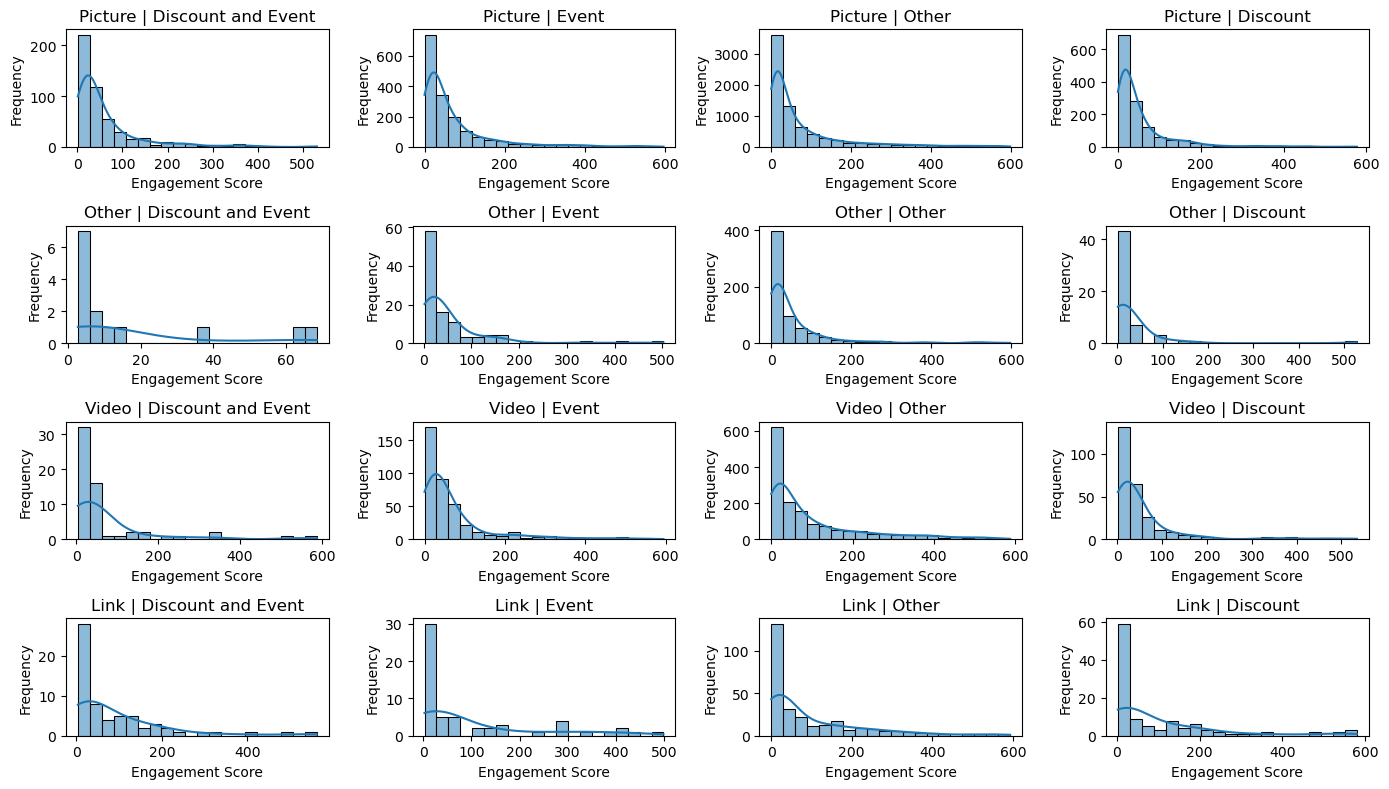

In [107]:
# Set up the matplotlib figure (adjust figsize as needed)
plt.figure(figsize=(14, 8))

# Plot distribution of 'Unweighted Engagement Score' for each 'Post Type' and 'Promotion Status'
count = 1
n_rows = len(filtered_df['Post Type'].unique())
n_cols = len(filtered_df['Promotion Status'].unique())

for post_type in filtered_df['Post Type'].unique():
    for promotion_status in filtered_df['Promotion Status'].unique():
        plt.subplot(n_rows, n_cols, count)
        count += 1
        subgroup = filtered_df[(filtered_df['Post Type'] == post_type) & (filtered_df['Promotion Status'] == promotion_status)]
        sns.histplot(subgroup['Unweighted_Engagement_Score'], kde=True, bins=20)
        plt.title(f'{post_type} | {promotion_status}')
        plt.xlabel('Engagement Score')
        plt.ylabel('Frequency')

# Adjust layout to prevent overlap between plots
plt.tight_layout()
plt.show()


# Boxplot Comparison of Engagement Score

## Objective
This section presents a comparative analysis of the 'Unweighted Engagement Score' across various combinations of 'Post Type' and 'Promotion Status'. The boxplot visualization facilitates the understanding of engagement score distribution and variations within different categories.

## Plot Setup
A boxplot is created using seaborn to visualize the distribution of engagement scores. The figsize parameter is adjusted to ensure the plot's dimensions are suitable for clear interpretation.

## Plotting Process
- The x-axis represents different 'Post Types', while the y-axis displays the 'Unweighted Engagement Score'.
- Each boxplot is categorized by both 'Post Type' and 'Promotion Status', with hue distinguishing between different promotion statuses within each post type.
- The boxes in the plot represent the interquartile range (IQR) of engagement scores, with the median value marked by a line within each box.
- Whiskers extend to the maximum and minimum values within 1.5 times the IQR from the first and third quartiles, respectively.
- Outliers, if present, are displayed as individual points beyond the whiskers.

## Interpretation
- A comparison of boxplots enables the assessment of engagement score distribution across different types of posts and promotion statuses.
- Differences in median values, as well as the spread and presence of outliers, provide insights into the effectiveness of various promotional strategies and post types in engaging the audience.


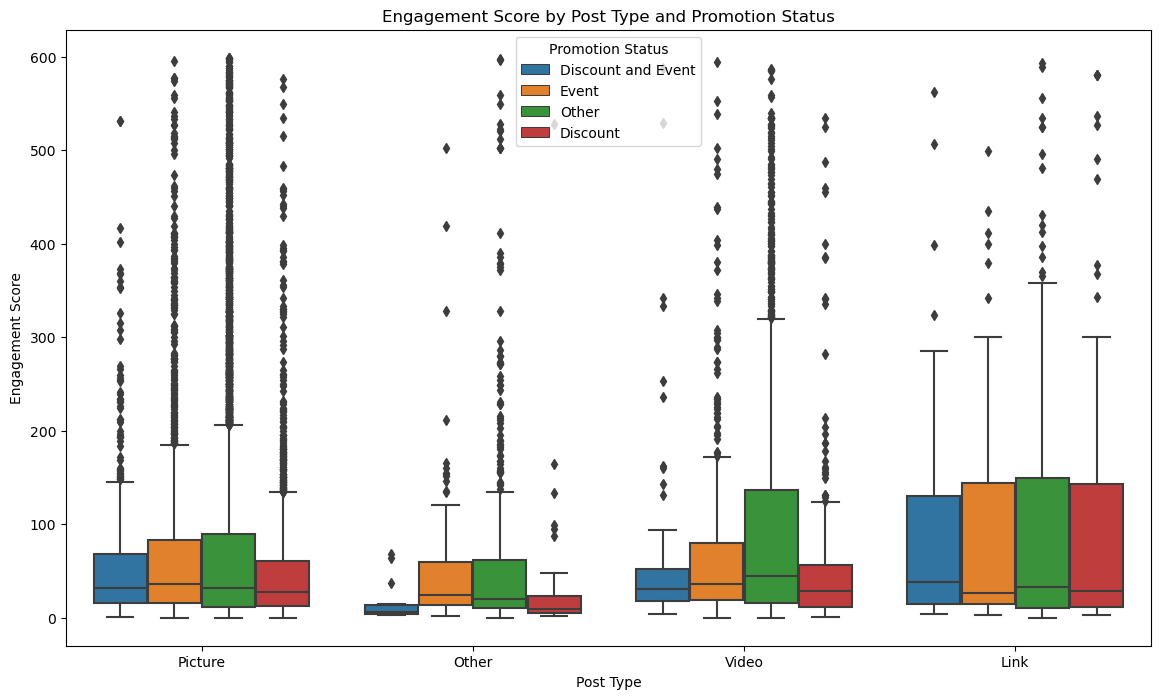

In [108]:
# Create a boxplot to compare 'Unweighted Engagement Score' across different 'Post Types' and 'Promotion Statuses'
plt.figure(figsize=(14, 8))
sns.boxplot(x='Post Type', y='Unweighted_Engagement_Score', hue='Promotion Status', data=filtered_df)
plt.title('Engagement Score by Post Type and Promotion Status')
plt.xlabel('Post Type')
plt.ylabel('Engagement Score')
plt.legend(title='Promotion Status')
plt.show()


# Lilliefors Test for Normality

## Objective
The Lilliefors test is performed to assess the normality of the distribution of engagement scores within different categories of 'Promotion Status' and 'Post Type'. This statistical test helps determine if the engagement scores follow a normal (Gaussian) distribution within each category.

## Lilliefors Test for Promotion Statuses
- A low p-value (< 0.05) suggests that the null hypothesis can be rejected, indicating that the engagement scores are not normally distributed.

### Results:
- **Event:** Statistic=0.2299, P-value=0.001
- **Discount:** Statistic=0.2544, P-value=0.001
- **Other:** Statistic=0.2391, P-value=0.001
- **Discount and Event:** Statistic=0.2370, P-value=0.001

## Lilliefors Test for Post Types
- Similar to the test for 'Promotion Status', the Lilliefors test is performed for each 'Post Type' category ('Picture', 'Video', 'Link').
- A p-value less than 0.05 indicates evidence against the null hypothesis of normality.

### Results:
- **Picture:** Statistic=0.2406, P-value=0.001
- **Video:** Statistic=0.2237, P-value=0.001
- **Link:** Statistic=0.2248, P-value=0.001

## Choice of Test
- The Lilliefors test is used instead of the Shapiro-Wilk test due to the large dataset size (above 5000).
- Shapiro-Wilk test results may not be reliable for such large datasets.
- Lilliefors test is preferred for its robustness in handling larger samples.

## Interpretation
- The Lilliefors test results provide insights into the distributional characteristics of engagement scores within different categories.
- Since all p-values are less than 0.05, we reject the null hypothesis of normality for all categories, suggesting that the engagement scores are not normally distributed within each category.

## Conclusion
The Lilliefors test highlights deviations from normality in the distribution of engagement scores across various 'Promotion Status' and 'Post Type' categories. These findings should be considered when applying statistical methods that assume normality.


In [126]:
# Lilliefors Test for each Promotion Status
print("Lilliefors Test for Normality - Promotion Statuses:")
for status in ['Event', 'Discount', 'Other', 'Discount and Event']:
    scores = filtered_df[filtered_df['Promotion Status'] == status]['Unweighted_Engagement_Score'].dropna()
    if len(scores) > 0:
        stat, p_value = lilliefors(scores)
        print(f"{status}: Statistic={stat}, P-value={p_value}")
    else:
        print(f"No data available for Promotion Status: {status}")
print("\n")

# Lilliefors Test for each Post Type
print("Lilliefors Test for Normality - Post Types:")
for type_ in ['Picture', 'Video', 'Link']:
    scores = filtered_df[filtered_df['Post Type'] == type_]['Unweighted_Engagement_Score'].dropna()
    if len(scores) > 0:
        stat, p_value = lilliefors(scores)
        print(f"{type_}: Statistic={stat}, P-value={p_value}")
    else:
        print(f"No data available for Post Type: {type_}")


Lilliefors Test for Normality - Promotion Statuses:
Event: Statistic=0.22990816088316582, P-value=0.0009999999999998899
Discount: Statistic=0.25437288615439035, P-value=0.0009999999999998899
Other: Statistic=0.23910804595461943, P-value=0.0009999999999998899
Discount and Event: Statistic=0.2370342186995656, P-value=0.0009999999999998899


Lilliefors Test for Normality - Post Types:
Picture: Statistic=0.24063475096653142, P-value=0.0009999999999998899
Video: Statistic=0.22368370164690776, P-value=0.0009999999999998899
Link: Statistic=0.22480556520892592, P-value=0.0009999999999998899


# Q-Q Plot Analysis

## Objective
Q-Q (quantile-quantile) plots are utilized to visually inspect the distribution of engagement scores within various categories. 

## Promotion Statuses
Each Q-Q plot represents a different promotion status category ('Event', 'Discount', 'Other', 'Discount and Event'). Deviations from the diagonal line suggest non-normality in engagement score distribution within each category.

## Post Types
Similar to promotion statuses, Q-Q plots are generated for different post type categories ('Picture', 'Video', 'Link'). Departures from the diagonal line indicate non-normality in engagement score distribution within each post type.

## Conclusion
The Q-Q plots indicate that engagement score distributions within promotion statuses and post types are not normally distributed. This observation should be considered when interpreting statistical analyses relying on normality assumptions.


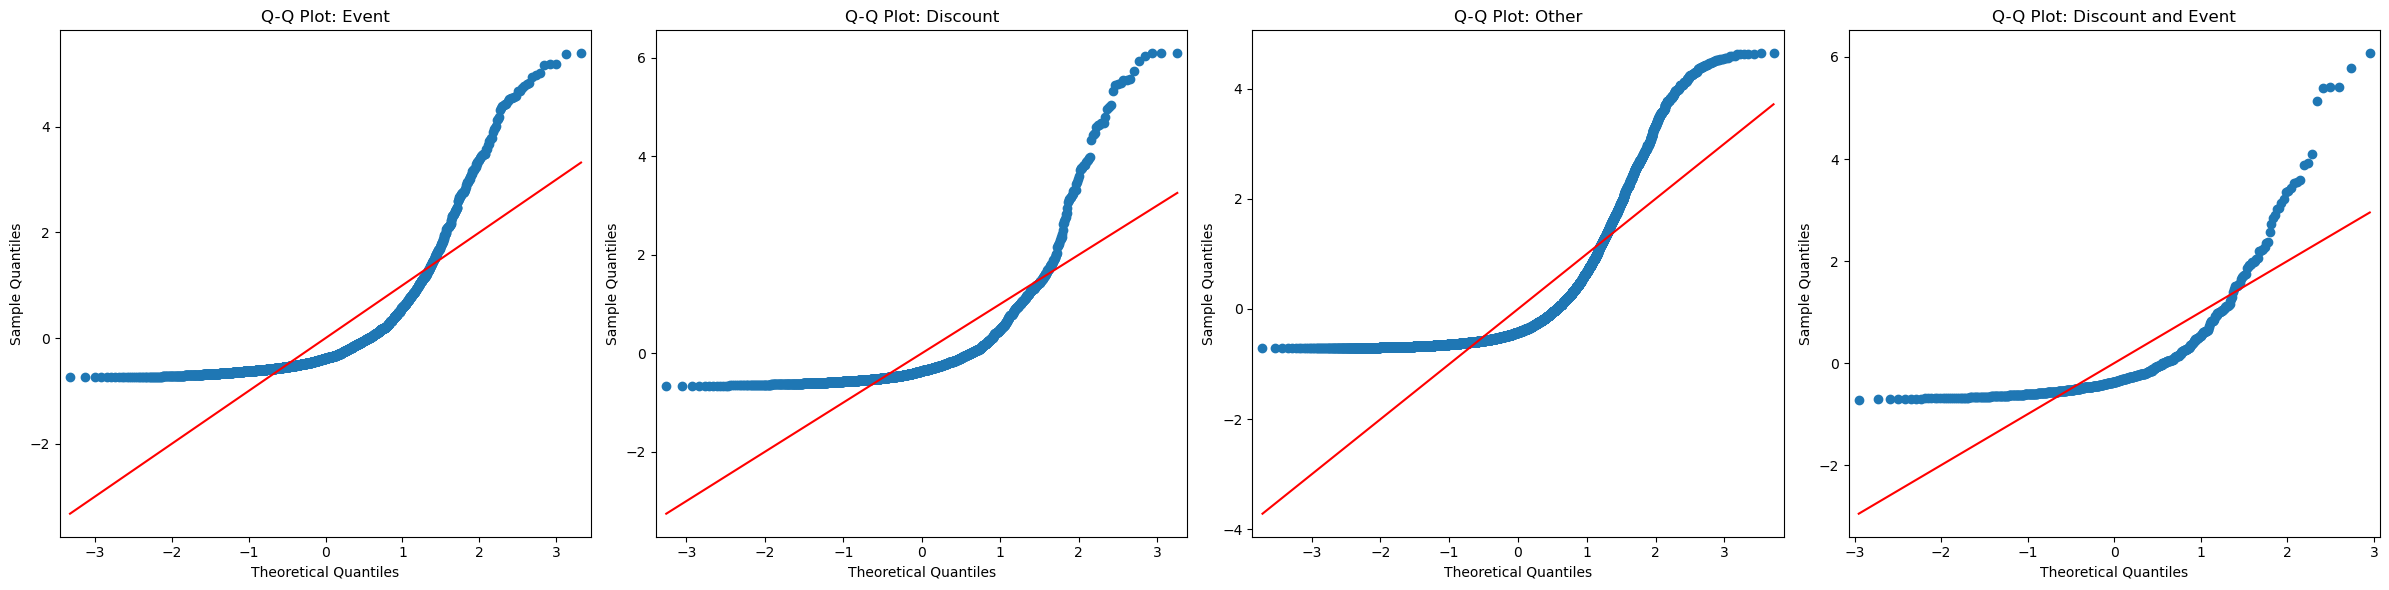

In [121]:


# Promotion statuses
promotion_statuses = ['Event', 'Discount', 'Other', 'Discount and Event']  # Now correctly separated

# Set up the matplotlib figure
plt.figure(figsize=(24, 6))  # Adjust the figure size as needed, increased width for the additional subplot

# Create a subplot for each promotion status
for i, status in enumerate(promotion_statuses, 1):  # Start enumeration at 1 for subplot indexing
    subgroup_scores = filtered_df[filtered_df['Promotion Status'] == status]['Unweighted_Engagement_Score'].dropna()
    if len(subgroup_scores) > 0:  # Check if the subgroup contains data
        plt.subplot(1, len(promotion_statuses), i)  # 1 row, 4 columns (since we now have 4 statuses), ith subplot
        sm.qqplot(subgroup_scores, line='s', fit=True, ax=plt.gca())  # 'gca' gets the current axis
        plt.title(f'Q-Q Plot: {status}')
    else:
        print(f"No data available for Promotion Status: {status}")

# Adjust layout to prevent overlap and ensure all titles and axes are visible
plt.tight_layout()
plt.show()



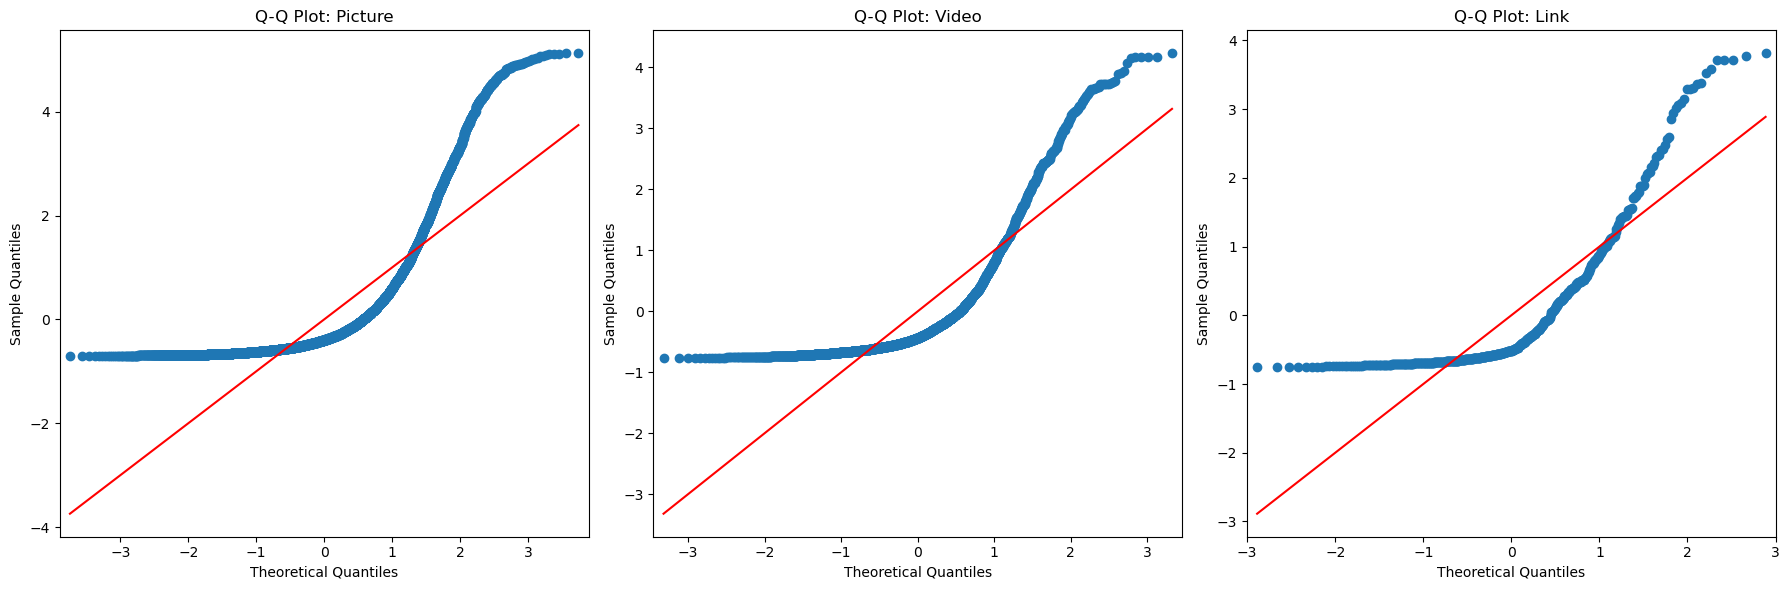

In [120]:


# Post types
post_types = ['Picture', 'Video', 'Link']  # Assuming these are your categories

# Set up the matplotlib figure
plt.figure(figsize=(18, 6))  # Adjust the figure size as needed

# Create a subplot for each post type
for i, type_ in enumerate(post_types, 1):  # Start enumeration at 1 for subplot indexing
    subgroup_scores = filtered_df[filtered_df['Post Type'] == type_]['Unweighted_Engagement_Score'].dropna()
    if len(subgroup_scores) > 0:  # Check if the subgroup contains data
        plt.subplot(1, len(post_types), i)  # 1 row, n columns, ith subplot
        sm.qqplot(subgroup_scores, line='s', fit=True, ax=plt.gca())  # 'gca' gets the current axis
        plt.title(f'Q-Q Plot: {type_}')
    else:
        print(f"No data available for Post Type: {type_}")

# Adjust layout to prevent overlap and ensure all titles and axes are visible
plt.tight_layout()
plt.show()




# Kruskal-Wallis Test Analysis

## Objective
The Kruskal-Wallis test is utilized to determine whether there are statistically significant differences in engagement scores across different promotion statuses and post types.

## Across Promotion Statuses
The Kruskal-Wallis test was conducted to assess if there are significant differences in engagement scores among different promotion statuses ('Event', 'Discount', 'Other', 'Discount and Event'). 

- **Statistic**: The test statistic value is 45.08.
- **P-value**: The p-value is approximately 8.90e-10.

## Across Post Types
Similarly, the Kruskal-Wallis test was performed to evaluate if there are significant differences in engagement scores across different post types ('Picture', 'Video', 'Link').

- **Statistic**: The test statistic value is 49.03.
- **P-value**: The p-value is approximately 2.25e-11.

## Conclusion
Both Kruskal-Wallis tests yielded extremely low p-values, indicating that there are statistically significant differences in engagement scores across both promotion statuses and post types.


In [128]:
# Prepare data for Kruskal-Wallis Test across Promotion Statuses
grouped_scores_by_status = [filtered_df[filtered_df['Promotion Status'] == status]['Unweighted_Engagement_Score'].dropna() for status in ['Event', 'Discount', 'Other', 'Discount and Event']]

# Kruskal-Wallis Test for different Promotion Statuses
stat, p_value = kruskal(*grouped_scores_by_status)
print(f"Kruskal-Wallis Test across Promotion Statuses: Statistic={stat}, P-value={p_value}")

# Prepare data for Kruskal-Wallis Test across Post Types
grouped_scores_by_type = [filtered_df[filtered_df['Post Type'] == type_]['Unweighted_Engagement_Score'].dropna() for type_ in ['Picture', 'Video', 'Link']]

# Kruskal-Wallis Test for different Post Types
stat, p_value = kruskal(*grouped_scores_by_type)
print(f"Kruskal-Wallis Test across Post Types: Statistic={stat}, P-value={p_value}")


Kruskal-Wallis Test across Promotion Statuses: Statistic=45.079071401928964, P-value=8.901511765459414e-10
Kruskal-Wallis Test across Post Types: Statistic=49.03082241232539, P-value=2.2547177904682083e-11


### Objective:
To determine if posts about promotional offers and events on Facebook receive significantly higher consumer engagement compared to other types of posts.

### Method:
- Conducted Mann-Whitney U Tests to compare engagement scores across different promotion statuses (Event, Discount, Other, Discount and Event).
- Used an adjusted alpha level to account for multiple comparisons.
  
### Hypotheses:
- Null Hypothesis (H0): There is no significant difference in engagement  between posts about events, discounts, and other types.
- Alternative Hypothesis (H1): Posts about promotional offers and events will experience significantly higher consumer engagement compared to other types.

### Results:
- Significant differences in engagement scores were found between posts about events and discounts, events and other types, discounts and other types.
- No significant difference was found between posts combining discounts and events and other types.
  
### Conclusion:
Based on the Mann-Whitney U Test results and considering the adjusted alpha level, we reject the null hypothesis (H0) for comparisons involving posts about events, discounts, and their combinations. This suggests that posts about promotional offers and events indeed experience significantly higher consumer engagement compared to other types of posts on Facebook.


In [131]:
# Number of comparisons
num_comparisons = len(promotion_statuses) * (len(promotion_statuses) - 1) / 2
adjusted_alpha = 0.05 / num_comparisons  # Adjust for multiple comparisons, if desired

# Store results
results = []

# Conduct Mann-Whitney U tests for each pair of promotion statuses
for i, status1 in enumerate(promotion_statuses):
    for status2 in promotion_statuses[i+1:]:
        scores1 = filtered_df[filtered_df['Promotion Status'] == status1]['Unweighted_Engagement_Score'].dropna()
        scores2 = filtered_df[filtered_df['Promotion Status'] == status2]['Unweighted_Engagement_Score'].dropna()
        if len(scores1) > 0 and len(scores2) > 0:  # Ensure both groups have data
            stat, p = mannwhitneyu(scores1, scores2)
            significant = 'Yes' if p < adjusted_alpha else 'No'
            results.append((status1, status2, stat, p, significant))

# Print results
print("Mann-Whitney U Test between Promotion Status Groups:")
for res in results:
    status1, status2, stat, p, significant = res
    print(f"{status1} vs {status2}: U statistic = {stat}, p-value = {p}, Significant at adjusted alpha ({adjusted_alpha}): {significant}")


Mann-Whitney U Test between Promotion Status Groups:
Event vs Discount: U statistic = 2222316.5, p-value = 3.3086479709447777e-13, Significant at adjusted alpha (0.008333333333333333): Yes
Event vs Other: U statistic = 11428265.0, p-value = 0.0013988890709173626, Significant at adjusted alpha (0.008333333333333333): Yes
Event vs Discount and Event: U statistic = 737353.0, p-value = 0.06501319504684146, Significant at adjusted alpha (0.008333333333333333): No
Discount vs Other: U statistic = 8047340.5, p-value = 8.089691667812198e-07, Significant at adjusted alpha (0.008333333333333333): Yes
Discount vs Discount and Event: U statistic = 506881.5, p-value = 0.0006191660550572327, Significant at adjusted alpha (0.008333333333333333): Yes
Other vs Discount and Event: U statistic = 3106758.5, p-value = 0.8671899022735544, Significant at adjusted alpha (0.008333333333333333): No


In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor



# Consider transforming variables (example for 'text_length')
filter_data['log_text_length'] = np.log(filter_data['text_length'] + 1)

# # Add interaction terms if relevant (example)
# filter_data['interaction_term'] = filter_data['variable1'] * filter_data['variable2']

# Remove outliers based on z-scores (example for 'Unweighted_Engagement_Score')
filter_data['z_scores'] = zscore(filter_data['Unweighted_Engagement_Score'])
filter_data = filter_data[np.abs(filter_data['z_scores']) <= 3]

# Calculate VIF for each explanatory variable
X = filter_data[['log_text_length', 'hashtag_count', 'readability_score', 'emoji_count']]
X['intercept'] = 1  # add intercept
vif_filter_data = pd.DataFrame()
vif_filter_data['feature'] = X.columns
vif_filter_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Fit the model
X = X.drop(['intercept'], axis=1)  # remove intercept before fitting the model
y = filter_data['Unweighted_Engagement_Score']
model = sm.OLS(y, sm.add_constant(X)).fit()

# Print model summary
print(model.summary())

# Diagnostic plots and further analysis as needed


                                 OLS Regression Results                                
Dep. Variable:     Unweighted_Engagement_Score   R-squared:                       0.014
Model:                                     OLS   Adj. R-squared:                  0.014
Method:                          Least Squares   F-statistic:                     54.72
Date:                         Thu, 21 Mar 2024   Prob (F-statistic):           7.03e-46
Time:                                 12:31:32   Log-Likelihood:            -1.1380e+05
No. Observations:                        15352   AIC:                         2.276e+05
Df Residuals:                            15347   BIC:                         2.277e+05
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

C:\Users\patri\AppData\Local\Temp\ipykernel_18652\1781683316.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_data['log_text_length'] = np.log(filter_data['text_length'] + 1)
C:\Users\patri\AppData\Local\Temp\ipykernel_18652\1781683316.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_data['z_scores'] = zscore(filter_data['Unweighted_Engagement_Score'])
C:\Users\patri\AppData\Local\Temp\ipykernel_18652\1781683316.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

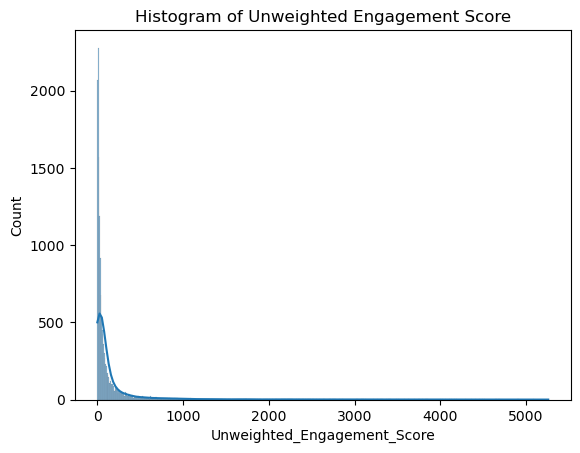

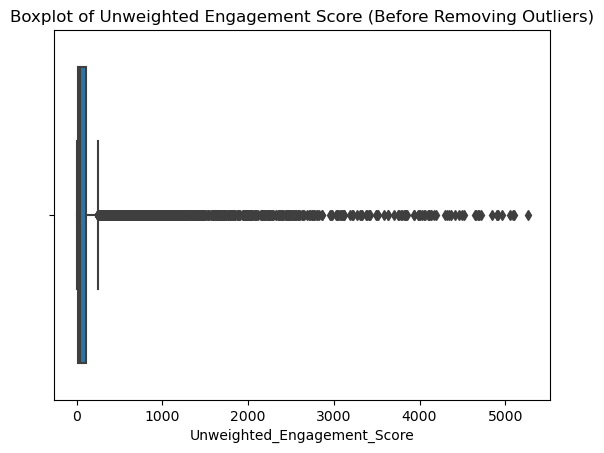

Outliers identified by z-score method: 318
Outliers identified by IQR method: 1981


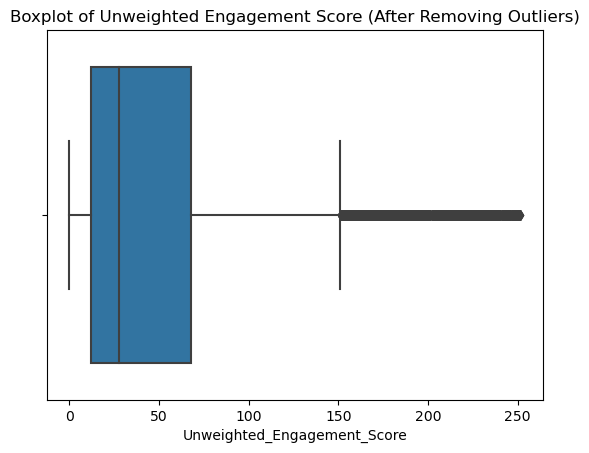

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Assuming filter_data is your DataFrame
# Plotting the histogram of the dependent variable
sns.histplot(filter_data['Unweighted_Engagement_Score'], kde=True)
plt.title('Histogram of Unweighted Engagement Score')
plt.show()

# Plotting the boxplot of the dependent variable before removing outliers
sns.boxplot(x=filter_data['Unweighted_Engagement_Score'])
plt.title('Boxplot of Unweighted Engagement Score (Before Removing Outliers)')
plt.show()

# Calculating z-scores
filter_data['z_score'] = np.abs(stats.zscore(filter_data['Unweighted_Engagement_Score']))
outliers_z = filter_data[filter_data['z_score'] > 3]

# Identifying outliers using IQR with conventional quartiles
Q1 = filter_data['Unweighted_Engagement_Score'].quantile(0.25)
Q3 = filter_data['Unweighted_Engagement_Score'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = filter_data[(filter_data['Unweighted_Engagement_Score'] < (Q1 - 1.5 * IQR)) | 
                           (filter_data['Unweighted_Engagement_Score'] > (Q3 + 1.5 * IQR))]

print("Outliers identified by z-score method:", outliers_z.shape[0])
print("Outliers identified by IQR method:", outliers_iqr.shape[0])

# Assuming you decide to remove outliers based on the IQR method
# Updating filter_data to exclude these outliers
filtered_data_no_extremes = filter_data[~filter_data.index.isin(outliers_iqr.index)]

# Plotting the boxplot of the dependent variable after removing outliers
sns.boxplot(x=filtered_data_no_extremes['Unweighted_Engagement_Score'])
plt.title('Boxplot of Unweighted Engagement Score (After Removing Outliers)')
plt.show()


In [23]:
filtered_data_no_extremes.groupby('Unweighted_Engagement_Score').size().head(20)

Unweighted_Engagement_Score
0.000000     54
1.000000    204
1.250000      1
1.333333      6
1.500000     16
1.666667     38
1.750000      4
2.000000    157
2.250000      5
2.333333     44
2.500000     35
2.666667     27
2.750000      9
3.000000    157
3.250000     10
3.333333     33
3.500000     48
3.666667     54
3.750000     15
4.000000    124
dtype: int64

In [24]:
from scipy.stats import shapiro, spearmanr

# Perform descriptive statistics for independent variables
descriptive_stats = filter_data[['text_length', 'hashtag_count', 'readability_score', 'emoji_count']].describe()

# Perform a normality test on 'Unweighted_Engagement_Score'
shapiro_test = shapiro(filter_data['Unweighted_Engagement_Score'].dropna())

# Perform correlation analysis between independent variables and 'Unweighted_Engagement_Score'
correlation_results = {}
for var in ['text_length', 'hashtag_count', 'readability_score', 'emoji_count']:
    correlation_test = spearmanr(filter_data[var], filter_data['Unweighted_Engagement_Score'])
    correlation_results[var] = correlation_test

descriptive_stats, shapiro_test, correlation_results


c:\Users\patri\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(        text_length  hashtag_count  readability_score   emoji_count
 count  15352.000000   15352.000000       15352.000000  15352.000000
 mean     243.020258       1.345297          72.438705      1.436360
 std      212.279943       4.739687          44.498058      1.727887
 min        1.000000       0.000000       -1739.000000      0.000000
 25%      108.000000       0.000000          56.000000      0.000000
 50%      206.000000       0.000000          69.000000      1.000000
 75%      310.000000       1.000000          81.000000      2.000000
 max     4149.000000      37.000000         206.000000     21.000000,
 ShapiroResult(statistic=0.3652070164680481, pvalue=0.0),
 {'text_length': SignificanceResult(statistic=-0.17165727767294972, pvalue=7.587001094178763e-102),
  'hashtag_count': SignificanceResult(statistic=-0.019171015074195063, pvalue=0.017531141108677976),
  'readability_score': SignificanceResult(statistic=0.06309699592540081, pvalue=5.073348437287514e-15),
  'emoji_count'

In [25]:
from scipy.stats import shapiro
shapiro(filter_data['Unweighted_Engagement_Score'].dropna())


c:\Users\patri\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.3652070164680481, pvalue=0.0)

In [26]:
from scipy.stats import spearmanr
for var in ['text_length', 'hashtag_count', 'readability_score', 'emoji_count']:
    print(var, spearmanr(filter_data[var], filter_data['Unweighted_Engagement_Score']))


text_length SignificanceResult(statistic=-0.17165727767294972, pvalue=7.587001094178763e-102)
hashtag_count SignificanceResult(statistic=-0.019171015074195063, pvalue=0.017531141108677976)
readability_score SignificanceResult(statistic=0.06309699592540081, pvalue=5.073348437287514e-15)
emoji_count SignificanceResult(statistic=-0.02375634538630065, pvalue=0.0032435334035681804)


In [27]:
import statsmodels.api as sm
X = filtered_data_no_extremes[['text_length', 'hashtag_count', 'readability_score', 'emoji_count']]
y = filtered_data_no_extremes['Unweighted_Engagement_Score']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:     Unweighted_Engagement_Score   R-squared:                       0.030
Model:                                     OLS   Adj. R-squared:                  0.030
Method:                          Least Squares   F-statistic:                     103.8
Date:                         Thu, 21 Mar 2024   Prob (F-statistic):           3.36e-87
Time:                                 12:31:35   Log-Likelihood:                -72257.
No. Observations:                        13371   AIC:                         1.445e+05
Df Residuals:                            13366   BIC:                         1.446e+05
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [28]:
import statsmodels.api as sm
X = outliers_iqr[['text_length', 'hashtag_count', 'readability_score', 'emoji_count']]
y = outliers_iqr['Unweighted_Engagement_Score']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     Unweighted_Engagement_Score   R-squared:                       0.011
Model:                                     OLS   Adj. R-squared:                  0.009
Method:                          Least Squares   F-statistic:                     5.303
Date:                         Thu, 21 Mar 2024   Prob (F-statistic):           0.000301
Time:                                 12:31:35   Log-Likelihood:                -16109.
No. Observations:                         1981   AIC:                         3.223e+04
Df Residuals:                             1976   BIC:                         3.226e+04
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [29]:
# Initialize a dictionary to store descriptive statistics for each variable within each post type
descriptive_stats = {var: {} for var in independent_vars}

# Iterate over each variable and post type to calculate descriptive statistics
for var in independent_vars:
    for post_type in post_type_columns:
        # Filter data for the current post type
        filtered_data = filter_data[filter_data[post_type] == 1][var]
        
        # Calculate descriptive statistics and store them in a more readable format
        descriptive_stats[var][post_type] = {
            'Mean': filtered_data.mean(),
            'Median': filtered_data.median(),
            'Standard Deviation': filtered_data.std(),
            'Interquartile Range': filtered_data.quantile(0.75) - filtered_data.quantile(0.25),
            'Count': filtered_data.count()  # Adding count for more insight
        }

# Convert the descriptive statistics dictionary to a DataFrame for better readability
descriptive_stats_df = pd.DataFrame(descriptive_stats).transpose()
descriptive_stats_df = pd.concat({k: pd.DataFrame(v).transpose() for k, v in descriptive_stats.items()}, axis=0)
descriptive_stats_df.index.names = ['Variable', 'Post Type']
descriptive_stats_df



NameError: name 'post_type_columns' is not defined

In [ ]:
from scipy.stats import kruskal

# Example: Comparing engagement scores across three parts of the day
scores_morning = merged_df[merged_df['Part of Day Numeric'] == 0]['Unweighted_Engagement_Score'].dropna()
scores_afternoon = merged_df[merged_df['Part of Day Numeric'] == 1]['Unweighted_Engagement_Score'].dropna()
scores_evening = merged_df[merged_df['Part of Day Numeric'] == 2]['Unweighted_Engagement_Score'].dropna()
scores_nights = merged_df[merged_df['Part of Day Numeric'] == 3]['Unweighted_Engagement_Score'].dropna()

stat, p = kruskal(scores_morning, scores_afternoon, scores_evening)
print(f"Kruskal-Wallis H Test: Statistic={stat}, p-value={p}")

KeyError: 'Part of Day Numeric'